<a href="https://colab.research.google.com/github/volinhbao/CS114.K21.KHTN/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd


In [22]:
dataset = pd.read_csv('/content/imdb-reviews-dataset.csv',header = 0)
dataset.head()

,Movie,Title,Review,isPos
0,Joker,As a viewer that actually went to TIFF and wit...,I was a person that saw all the hype and claim...,0
1,Joker,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul...",0
2,Joker,Only certain people can relate,This is a movie that only those who have felt ...,0
3,Joker,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o...",0
4,Joker,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...,0


In [23]:
dataset

,Movie,Title,Review,isPos
0,Joker,As a viewer that actually went to TIFF and wit...,I was a person that saw all the hype and claim...,0
1,Joker,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul...",0
2,Joker,Only certain people can relate,This is a movie that only those who have felt ...,0
3,Joker,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o...",0
4,Joker,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...,0
...,...,...,...,...
6280,Thor: Ragnarok,Bad casting welcome back cheesy movies,This is like the old Batman movies with Jim Ca...,1
6281,Thor: Ragnarok,Surreal,The Good: Visually I loved pretty much everyth...,1
6282,Thor: Ragnarok,Identitiy Politics barf,"Yeah, it started a few years before, but this ...",1
6283,Thor: Ragnarok,MCU doesn't suck but this movie SUCKS (get it),I may be late to review this movie but better ...,1


Dataset is not skewed


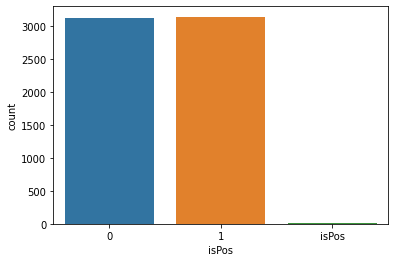

In [24]:
import seaborn as sns

sns.countplot(dataset.isPos)

In [25]:
dataset.isna().sum()

Movie     0
Title     0
Review    0
isPos     0
dtype: int64

In [26]:
dataset.shape

(6285, 4)

In [27]:
dataset.isPos.value_counts()

1        3144
0        3125
isPos      16
Name: isPos, dtype: int64

In [28]:
dataset.to_csv()

#**Preprocessing**



In [31]:
dataset = dataset.rename(columns = {'Movie':'movie','Title':'title','Review':'review'})
dataset

,movie,title,review,isPos
0,Joker,As a viewer that actually went to TIFF and wit...,I was a person that saw all the hype and claim...,0
1,Joker,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul...",0
2,Joker,Only certain people can relate,This is a movie that only those who have felt ...,0
3,Joker,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o...",0
4,Joker,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...,0
...,...,...,...,...
6280,Thor: Ragnarok,Bad casting welcome back cheesy movies,This is like the old Batman movies with Jim Ca...,1
6281,Thor: Ragnarok,Surreal,The Good: Visually I loved pretty much everyth...,1
6282,Thor: Ragnarok,Identitiy Politics barf,"Yeah, it started a few years before, but this ...",1
6283,Thor: Ragnarok,MCU doesn't suck but this movie SUCKS (get it),I may be late to review this movie but better ...,1


In [33]:
dataset.to_csv('/content/imdb-reviews-dataset.csv',index=False)

### Let's take a look at a arbitrary review


In [34]:
dataset.review.loc[1245]

'Those who complain and give bad reviews because of the "slow pace" or lack of action in this movie are the people in life that you should be weary of. It separates those who are willing to dive deep into life\'s tumultuous seas or just be happy living superficially on its surface.5 out of 10 found this helpful.Was this review helpful?Sign into vote.Permalink'

Because HTML tags were removed in the crawling step, so we'll skip that step and come to remove all other character that's NOT alphabet using Regular Expression

In [61]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
foo = 'A /very \\terrible very-old-time-BBC \'s '
print(foo)

A /very \terrible very-old-time-BBC 's 


In [50]:

foo = re.sub('[^a-zA-Z]', ' ', foo)
print(foo)

AveryterribleveryoldtimeBBCs


In [83]:
def preprocess(reviews):
  for review in reviews:
    # Remove all characters NOT alphabet
    review = re.sub('[^a-zA-Z]', ' ', review)

    # Remove 'permalink'
    review = re.sub('Permalink','',review)
    # Lowercase the review
    review = review.lower()

    # Split the review into words using Word Tokenizer
    review = word_tokenize(review)
    print('Tokenize: ',review)
    # Remove stopwords
    review = [word for word in review if not word in stop_words]
    print(review)
    # Lemmatizing the tokens
    review = [lem.lemmatize(word) for word in review]
    print('Lemma: ', review)
    # Merge the tokens back to a full review
    review = ' '.join(review)
  return reviews

In [84]:
foo_test = preprocess(dataset.review[:5])

Tokenize:  ['i', 'was', 'a', 'person', 'that', 'saw', 'all', 'the', 'hype', 'and', 'claims', 'of', 'masterpiece', 'as', 'overreacting', 'and', 'overblown', 'excitement', 'for', 'another', 'joker', 'based', 'film', 'i', 'thought', 'this', 'looked', 'solid', 'at', 'best', 'and', 'even', 'a', 'bit', 'too', 'pretentious', 'in', 'the', 'trailer', 'but', 'in', 'here', 'to', 'say', 'i', 'was', 'incredibly', 'wrong', 'this', 'is', 'a', 'massive', 'achievement', 'of', 'cinema', 'that', 's', 'extremely', 'rare', 'in', 'a', 'day', 'and', 'age', 'of', 'cgi', 'nonsense', 'and', 'reboots', 'while', 'this', 'is', 'somewhat', 'of', 'a', 'reboot', 'of', 'sorts', 'the', 'standalone', 'origin', 'tale', 'is', 'impeccable', 'from', 'start', 'to', 'finish', 'and', 'echoes', 'resemblance', 'to', 'the', 'best', 'joker', 'origin', 'comics', 'from', 'the', 'past', 'joaquin', 'bleeds', 'sweats', 'and', 'cries', 'his', 'every', 'drop', 'into', 'this', 'magnificently', 'dedicated', 'performance', 'heath', 'ledger'

In [81]:
print(dataset.review[0])

I was a person that saw all the hype and claims of masterpiece as overreacting and overblown excitement for another Joker based film. I thought this looked solid at best and even a bit too pretentious in the trailer, but in here to say I was incredibly wrong. This is a massive achievement of cinema that's extremely rare in a day and age of cgi nonsense and reboots. While this is somewhat of a reboot of sorts, the standalone origin tale is impeccable from start to finish and echoes resemblance to the best joker origin comics from the past. Joaquin bleeds, sweats, and cries his every drop into this magnificently dedicated performance. Heath Ledger would be proud. This is undoubtedly the greatest acting performance since Heath's joker. The directing and writing is slickly brilliant and the bleak settings and tones are palpable throughout. When this film was over the place was blown away and every audience member was awestruck that they witnessed a film that could still transport them into

In [76]:
print(foo_test[0])

I was a person that saw all the hype and claims of masterpiece as overreacting and overblown excitement for another Joker based film. I thought this looked solid at best and even a bit too pretentious in the trailer, but in here to say I was incredibly wrong. This is a massive achievement of cinema that's extremely rare in a day and age of cgi nonsense and reboots. While this is somewhat of a reboot of sorts, the standalone origin tale is impeccable from start to finish and echoes resemblance to the best joker origin comics from the past. Joaquin bleeds, sweats, and cries his every drop into this magnificently dedicated performance. Heath Ledger would be proud. This is undoubtedly the greatest acting performance since Heath's joker. The directing and writing is slickly brilliant and the bleak settings and tones are palpable throughout. When this film was over the place was blown away and every audience member was awestruck that they witnessed a film that could still transport them into